# 논리회로 진리표

| x1 | x2 | OR | AND | NAND | XOR |
|----|----|-----|----|-----|-----|
| 0 | 0 | 0 | 0 | 1 | 0 |
| 0 | 1 | 1 | 0 | 1 | 1 |
| 1 | 0 | 1 | 0 | 1 | 1 |
| 1 | 1 | 1 | 1 | 0 | 0 |
 

In [3]:
# OR Gate
def OR(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.2
  tmp = w1 * x1 + w2 * x2
  #print('w1 * x1 = ' , w1 * x1)
  #print('w2 * x2 = ' , w2 * x2)
  #print('w1 * x1 + w2 * x2 = ' , tmp)
  if tmp > theta :
    return 1
  else:
    return 0


In [4]:
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


In [5]:
# AND Gate
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = w1 * x1 + w2 * x2
  if tmp > theta :
    return 1
  else:
    return 0


In [6]:
print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


In [7]:
# NAND Gate
def NAND(x1, x2):
  w1, w2, theta = -0.5, -0.5, -0.7
  tmp = w1 * x1 + w2 * x2
  if tmp > theta :
    return 1
  else:
    return 0


In [8]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


In [9]:
# numpy의 배열을 이용하여 논리회로를 간결하게 구현
import numpy as np

def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    tmp = np.sum(w*x)+b
    if tmp > 0 :
        return 1
    else :
        return 0

print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


In [10]:
# numpy의 배열을 이용하여 논리회로를 간결하게 구현
import numpy as np

# AND Gate
def AND(x):
  w = np.array([0.5, 0.5]) 
  b = - 0.7

  tmp = np.dot(w, x) + b
  y = tmp > 0
  return y.astype(np.int)

# NAND Gate
def NAND(x):
  w = np.array([-0.5, -0.5]) 
  b = 0.7

  tmp = np.dot(w, x) + b
  y = tmp > 0
  return y.astype(np.int)

# OR Gate
def OR(x):
  w = np.array([0.5, 0.5]) 
  b = - 0.2

  tmp = np.dot(w, x) + b
  y = tmp > 0
  return y.astype(np.int)

In [11]:
# x1, 2의 값을 x에 배열로 저장
x = [[0,1,0,1], [0,0,1,1]]

print(AND(x))
print(NAND(x))
print(OR(x))

[0 0 0 1]
[1 1 1 0]
[0 1 1 1]


In [12]:
# 진리표의 해답
AndY =  [0, 0, 0, 1]
NAndY = [1, 1, 1, 0]
OrY  =  [0, 1, 1, 1]
XOrY  =  [0, 1, 1, 0]

print(AndY == AND(x))
print(NAndY == NAND(x))
print(OrY == OR(x))

  

[ True  True  True  True]
[ True  True  True  True]
[ True  True  True  True]


# XOR Gate
단층 신경망의 선형 boundary 로는 XOR을 분류할 수 없음
다층 신경망을 통해 비선형 영역 분리 가능  
![XOR ](https://drive.google.com/uc?export=download&id=1F8UqHJqWLopkIcIzCHcwN5xaQAluokHT)   
 

In [13]:
# XOR Gate
def XOR(x):
  s1 = NAND(x)
  s2 = OR(x)
  y = AND([s1,s2])
  return y.astype(int)


In [14]:
x = [[0,1,0,1], [0,0,1,1]]
XOrY  =  [0, 1, 1, 0]

print(XOR(x))

print(XOrY == XOR(x))

[0 1 1 0]
[ True  True  True  True]


# 활성화 함수
![XOR ](https://drive.google.com/uc?export=download&id=1jEFdVOHwTI2GuyCa21RoiDZT2hesOLtP)   
 
 

In [15]:
# 계단함수
def step_function(x):
  y = x > 0 
  return y.astype(int)
  
# 시그모이드
def sigmoid_function(x):
  y = 1 / (1 + np.exp(-x))
  return y

<function matplotlib.pyplot.show>

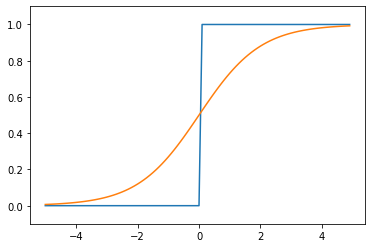

In [16]:
import matplotlib.pylab as plt
x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x,y)
y = sigmoid_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show

In [17]:
# ReLU(Rectified Linear Unit)
def relu_function(x):
  y = np.maximum(0, x)
  return y

<function matplotlib.pyplot.show>

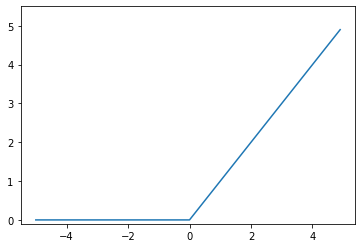

In [18]:
import matplotlib.pylab as plt
x = np.arange(-5, 5, 0.1)
y = relu_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 5.5)
plt.show

# Keras를 이용한 MLP 학습
https://keras.io/ko/models/model/

In [24]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()

# Layer 1
# input_dim=2 : 입력값은 2차원
# units=2 : 2개 신경망 노드
# activation='sigmoid' : 활성화 함수는 시그모이드
model.add(Dense(units=2,activation='sigmoid',input_dim=2))

# Layer 2
# units=1 : 1개 신경망 노드
# activation='sigmoid' : 활성화 함수는 시그모이드
model.add(Dense(units=1,activation='sigmoid'))

# 모델 구성
# binary_crossentropy : 이진분류 로스 설정
model.compile(optimizer=optimizers.RMSprop(lr=0.05),loss='binary_crossentropy',metrics=['binary_accuracy'])




In [25]:
# 모델의 아키텍처 요약
print(model.summary())
# 모델의 초기 가중치
print(model.get_weights())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
[array([[-0.01875591, -1.0152724 ],
       [ 0.22107112,  0.9130579 ]], dtype=float32), array([0., 0.], dtype=float32), array([[-0.45044696],
       [-1.0084399 ]], dtype=float32), array([0.], dtype=float32)]


In [26]:
x = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = np.array([0.,1.,1.,0.])

model.fit(x,y,epochs=600,batch_size=1)


 

Epoch 1/600
4/4 [==============================] - 0s 17ms/step - loss: 0.8193 - binary_accuracy: 0.5000
Epoch 2/600
4/4 [==============================] - 0s 2ms/step - loss: 0.7609 - binary_accuracy: 0.5000
Epoch 3/600
4/4 [==============================] - 0s 2ms/step - loss: 0.7474 - binary_accuracy: 0.5000
Epoch 4/600
4/4 [==============================] - 0s 2ms/step - loss: 0.7374 - binary_accuracy: 0.5000
Epoch 5/600
4/4 [==============================] - 0s 2ms/step - loss: 0.7305 - binary_accuracy: 0.5000
Epoch 6/600
4/4 [==============================] - 0s 2ms/step - loss: 0.7293 - binary_accuracy: 0.5000
Epoch 7/600
4/4 [==============================] - 0s 3ms/step - loss: 0.7272 - binary_accuracy: 0.5000
Epoch 8/600
4/4 [==============================] - 0s 2ms/step - loss: 0.7229 - binary_accuracy: 0.2500
Epoch 9/600
4/4 [==============================] - 0s 3ms/step - loss: 0.7258 - binary_accuracy: 0.7500
Epoch 10/600
4/4 [==============================] - 0s 2ms/step

In [27]:
print(model.get_weights())

print(model.predict(x,batch_size=4))
 

[array([[-20.980122 ,   9.509695 ],
       [-20.987028 ,   9.4920435]], dtype=float32), array([  6.2108884, -14.4143095], dtype=float32), array([[-31.68224],
       [-31.05861]], dtype=float32), array([15.452532], dtype=float32)]
[[9.5298468e-08]
 [9.9999976e-01]
 [9.9999976e-01]
 [2.2818266e-07]]
